In [ ]:
from textblob import TextBlob #TextBlob is built upon nltk
import nltk
import numpy as np
nltk.download('punkt')
nltk.download('brown')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import unicodedata
import re
import spacy
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

stop_words.extend(['cannot','would'])
print(stop_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before'

In [ ]:
#source: https://github.com/dipanjanS/text-analytics-with-python/tree/master/New-Second-Edition/Ch03%20-%20Processing%20and%20Understanding%20Text

CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [ ]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP): #create a function to expand contractions for each text
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [ ]:
#try different sample comments from the corpus using this function and keep adjusting the normalizer function

def normalizer(text):
  text = re.sub(r'(dont|DONT|Dont)',"don't",text)
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf8', 'ignore') #convert accented characters to normal English characters
  text = expand_contractions(text) #expand contractions in the text
  #text = re.sub('-','',text) #to remove hypens in the text to ensure a compound word is considered as a whole word
  text = re.sub(r'(@\w+)','',text) #remove @user from the text
  text = nlp("".join(text)) 
  text = [word.lemma_ if word.pos_ in ['NOUN', 'ADJ', 'VERB', 'ADV'] else str(word) for word in text] #lemmatize each word based on its POS in the text and create a clean word list
  text = ' '.join(text)
  text = ' '.join([word.lower() for word in TextBlob(text).words if word.lower() not in stop_words]) #remove stopwords from the text and lowercase all the words
  text = re.sub(r'(\w*\d+:*\w*)','',text) #remove digits, such as 2:15, 80s,80's from text
  text = [word for word in text.split() if (word not in [' ','  ','   ','    '])&(len(word)>1)] #remove extra space and a single character from text
  text = ' '.join(text)
  return text

In [ ]:
#connect to the Excel file in Google Drive ("always_unique_English_comments.xlsx")
from google.colab import drive
drive.mount('/content/drive')
! ls /content/drive/MyDrive/always_unique_English_comments.xlsx

import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/always_unique_English_comments.xlsx')

#df['text_clean'] = df['text'].apply(normalizer)

#df.to_excel('/content/drive/MyDrive/always_unique_English_comments.xlsx', index=False)

df.head(5)

Mounted at /content/drive
/content/drive/MyDrive/always_unique_English_comments.xlsx


,Unnamed: 0,comment_id,comment_id.1,comment_id.1.1,comment_id.1.1.1,text,time,author,like,language,time_order,mention,comment_or_reply,reply,brand presence,ad sentiment,text_clean
0,2,False,False,False,UgjKJvPp3seTt3gCoAEC,Great use of the power of brand content. You g...,5 years ago,Mary-Noelle Dana,3,True,3,No,0,0,NaN,NaN,great use power brand content guy girl behind ...
1,3,False,False,False,Uggt7Cvi4lu9CngCoAEC,":) Made us think,",5 years ago,Jessie Liu,5,True,4,No,0,0,0.0,2.0,make us think
2,4,False,False,False,UgjcmlECUIp3jHgCoAEC,Great video! Great campaign! =),5 years ago,AlexP,3,True,5,No,0,0,NaN,NaN,great video great campaign
3,5,False,False,False,UgjJjkSMfbD-5HgCoAEC,"Because #likeagirl is a great thing, not som...",5 years ago,Clayton Reeves,17,True,6,No,0,0,NaN,NaN,likeagirl great thing something ashamed
4,6,False,False,False,UgjbPhQQb_kv3HgCoAEC,most thoughtful advertisement ive come across ...,5 years ago,mia montillano,28,True,7,No,0,0,0.0,2.0,thoughtful advertisement come across youtube


In [ ]:
#Sanitation check, check the vocabulary size of the corpus and create a vocabulary list of words that apear at least 2 times in the corpus

from collections import Counter

def vocabulary(corpus):
  vocabulary_list = []
  for text in corpus:
    vocabulary_list.extend(str(text).split())
  c = Counter(vocabulary_list)
  rare_word_list = [key for key, value in c.items() if value==1] #a list of words that only appear 1 time in the corpus
  final_vocabulary_list = [key for key, value in c.items()]
  return final_vocabulary_list, len(final_vocabulary_list), len(set(vocabulary_list)), len(rare_word_list)

vocabulary(df['text_clean'])[1:4]

(15169, 15169, 7575)

In [ ]:
#check the vocabulary size of the labeled data and the common words

df_labeled = df[(df['text_clean'].notnull())&(df['ad sentiment'].notnull())] #remove comments that have no text after preprocessing
print(df_labeled.shape)
print(vocabulary(df_labeled['text_clean'])[1:4])

df_labeled  = df_labeled.drop_duplicates(subset='text_clean', keep="first") #remove duplicate comments
print(df_labeled.shape)
print(vocabulary(df_labeled['text_clean'])[1:4])

(7445, 17)
(9165, 9165, 4579)
(7217, 17)
(9165, 9165, 4580)



# Create training and testing dataset from the labeled data




In [ ]:
#check the number of comments for each category

negative_ad = df_labeled[df_labeled['ad sentiment']==0]
neutral_ad = df_labeled[df_labeled['ad sentiment']==1]
positive_ad = df_labeled[df_labeled['ad sentiment']==2]
irrelevant_ad = df_labeled[df_labeled['ad sentiment']==3]

print(negative_ad.shape, neutral_ad.shape,positive_ad.shape,irrelevant_ad.shape)

(3687, 17) (812, 17) (2575, 17) (143, 17)


In [ ]:
#combine neural and irreelvant comments

df_labeled['ad_sentiment_new'] = df_labeled['ad sentiment']
df_labeled['ad_sentiment_new'].replace({3: 1}, inplace=True)

#check the number of comments for each category

negative_ad = df_labeled[df_labeled['ad_sentiment_new']==0]
neutral_ad = df_labeled[df_labeled['ad_sentiment_new']==1]
positive_ad = df_labeled[df_labeled['ad_sentiment_new']==2]

print(negative_ad.shape, neutral_ad.shape,positive_ad.shape)

(3687, 18) (955, 18) (2575, 18)


In [ ]:
from sklearn.model_selection import train_test_split

train_corpus, test_corpus, train_label, test_label = train_test_split(df_labeled['text_clean'], df_labeled['ad_sentiment_new'], test_size = 0.2, random_state=42)

print('vacabulary size for the labeled data:', vocabulary(df_labeled['text_clean'])[1])
print('vacabulary size for the training data:', vocabulary(train_corpus)[1])
train_corpus.shape, test_corpus.shape, train_label.shape, test_label.shape

vacabulary size for the labeled data: 9165
vacabulary size for the training data: 8173


((5773,), (1444,), (5773,), (1444,))

# SMOTE technique to deal with imbalanced training data

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, sampling_strategy='not majority')
tfidf_train_features, train_label = smote.fit_sample(tfidf_train_features, train_label)

# Train the machine using machine learning algorithms

In [ ]:
#Naive Bayes: select the best parameters (the combination with the highest test accuracy)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

ngram_list = [(1,1),(1,2)]
alpha_list = [0,0.3,0.6,1]

for ngram_range in ngram_list:
    train_corpus, test_corpus, train_label, test_label = train_test_split(df_labeled['text_clean'], df_labeled['ad_sentiment_new'], test_size = 0.2, random_state=42)
    tfidf = TfidfVectorizer(min_df=1, ngram_range=ngram_range) 
    tfidf_train_features = tfidf.fit_transform(train_corpus.values.astype('U'))
    tfidf_train_features, train_label = smote.fit_sample(tfidf_train_features, train_label)
    tfidf_test_features = tfidf.transform(test_corpus.values.astype('U'))
    for alpha in alpha_list:
      nb = MultinomialNB(alpha=alpha)
      nb.fit(tfidf_train_features, train_label)
      nb_tfidf_cv_scores = cross_val_score(nb, tfidf_train_features, train_label, cv=5) #5-fold
      nb_tfidf_cv_mean_score = np.mean(nb_tfidf_cv_scores)
      print('ngram:',ngram_range)
      print('alpha:',alpha)
      print('Mean Training CV accuracy (5-fold):', nb_tfidf_cv_mean_score)
      print('Test accuracy:',accuracy_score(test_label, nb.predict(tfidf_test_features)))
    

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _

ngram: (1, 1)
alpha: 0
Mean Training CV accuracy (5-fold): 0.8066659787954193
Test accuracy: 0.6232686980609419
ngram: (1, 1)
alpha: 0.3
Mean Training CV accuracy (5-fold): 0.7802186164545978
Test accuracy: 0.6710526315789473
ngram: (1, 1)
alpha: 0.6
Mean Training CV accuracy (5-fold): 0.7693022263607032
Test accuracy: 0.6821329639889196
ngram: (1, 1)
alpha: 1
Mean Training CV accuracy (5-fold): 0.7575984979930407
Test accuracy: 0.6883656509695291


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _

ngram: (1, 2)
alpha: 0
Mean Training CV accuracy (5-fold): 0.8587682378194567
Test accuracy: 0.6412742382271468
ngram: (1, 2)
alpha: 0.3
Mean Training CV accuracy (5-fold): 0.8579812160508636
Test accuracy: 0.6869806094182825
ngram: (1, 2)
alpha: 0.6
Mean Training CV accuracy (5-fold): 0.8579815325560387
Test accuracy: 0.6869806094182825
ngram: (1, 2)
alpha: 1
Mean Training CV accuracy (5-fold): 0.8494289297124297
Test accuracy: 0.6862880886426593


In [ ]:
#Naive Bayes with the best parameters

train_corpus, test_corpus, train_label, test_label = train_test_split(df_labeled['text_clean'], df_labeled['ad_sentiment_new'], test_size = 0.2, random_state=42)
tfidf = TfidfVectorizer(min_df=1, ngram_range=(1,1)) 
tfidf_train_features = tfidf.fit_transform(train_corpus.values.astype('U'))
tfidf_train_features, train_label = smote.fit_sample(tfidf_train_features, train_label)
tfidf_test_features = tfidf.transform(test_corpus.values.astype('U'))
nb = MultinomialNB(alpha=1)
nb.fit(tfidf_train_features, train_label)
nb_tfidf_cv_scores = cross_val_score(nb, tfidf_train_features, train_label, cv=5) #5-fold
nb_tfidf_cv_mean_score = np.mean(nb_tfidf_cv_scores)
print('Training CV accuracy (5-fold):', nb_tfidf_cv_scores)
print('Mean Training CV accuracy (5-fold):', nb_tfidf_cv_mean_score)
print('Test accuracy:',accuracy_score(test_label, nb.predict(tfidf_test_features)))
print('Balanced Test accuracy:',balanced_accuracy_score(test_label, nb.predict(tfidf_test_features)))
print('Report:',classification_report(test_label, nb.predict(tfidf_test_features)))
print('MICRO precision_recall_fscore_support:', precision_recall_fscore_support(test_label, nb.predict(tfidf_test_features), average='micro'))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Training CV accuracy (5-fold): [0.73734533 0.72537985 0.74732696 0.78221722 0.79572313]
Mean Training CV accuracy (5-fold): 0.7575984979930407
Test accuracy: 0.6883656509695291
Balanced Test accuracy: 0.6060257578195698
Report:               precision    recall  f1-score   support

         0.0       0.78      0.73      0.75       725
         1.0       0.46      0.30      0.36       208
         2.0       0.64      0.78      0.71       511

    accuracy                           0.69      1444
   macro avg       0.63      0.61      0.61      1444
weighted avg       0.68      0.69      0.68      1444

MICRO precision_recall_fscore_support: (0.6883656509695291, 0.6883656509695291, 0.6883656509695291, None)


In [ ]:
#Support Vector Machine: select the best parameters

from sklearn.linear_model import SGDClassifier

ngram_list = [(1,1),(1,2)]
alpha_list = [0.00001,0.0001,0.001,0.01]

for ngram_range in ngram_list:
    train_corpus, test_corpus, train_label, test_label = train_test_split(df_labeled['text_clean'], df_labeled['ad_sentiment_new'], test_size = 0.2, random_state=42)
    tfidf = TfidfVectorizer(min_df=1, ngram_range=ngram_range) 
    tfidf_train_features = tfidf.fit_transform(train_corpus.values.astype('U'))
    tfidf_train_features, train_label = smote.fit_sample(tfidf_train_features, train_label)
    tfidf_test_features = tfidf.transform(test_corpus.values.astype('U'))
    for alpha in alpha_list:
      svm = SGDClassifier(loss='hinge', penalty='l2',random_state=42,max_iter=500, alpha=alpha)
      svm.fit(tfidf_train_features, train_label)
      svm_tfidf_cv_scores = cross_val_score(svm, tfidf_train_features, train_label, cv=5) #5-fold
      svm_tfidf_cv_mean_score = np.mean(svm_tfidf_cv_scores)
      print('ngram:',ngram_range)
      print('alpha:',alpha)
      print('Mean Training CV accuracy (5-fold):', svm_tfidf_cv_mean_score)
      print('Test accuracy:',accuracy_score(test_label, svm.predict(tfidf_test_features)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


ngram: (1, 1)
alpha: 1e-05
Mean Training CV accuracy (5-fold): 0.8147678782695775
Test accuracy: 0.6454293628808865
ngram: (1, 1)
alpha: 0.0001
Mean Training CV accuracy (5-fold): 0.7992377289361058
Test accuracy: 0.6765927977839336
ngram: (1, 1)
alpha: 0.001
Mean Training CV accuracy (5-fold): 0.7334026901673869
Test accuracy: 0.6655124653739612
ngram: (1, 1)
alpha: 0.01
Mean Training CV accuracy (5-fold): 0.6877116232727521
Test accuracy: 0.6281163434903048


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


ngram: (1, 2)
alpha: 1e-05
Mean Training CV accuracy (5-fold): 0.8910660717213388
Test accuracy: 0.6890581717451524
ngram: (1, 2)
alpha: 0.0001
Mean Training CV accuracy (5-fold): 0.8863407760580294
Test accuracy: 0.695983379501385
ngram: (1, 2)
alpha: 0.001
Mean Training CV accuracy (5-fold): 0.8102664783671878
Test accuracy: 0.675207756232687
ngram: (1, 2)
alpha: 0.01
Mean Training CV accuracy (5-fold): 0.7920353371697981
Test accuracy: 0.6627423822714681


In [ ]:
#Support Vector Machine with the best parameters

train_corpus, test_corpus, train_label, test_label = train_test_split(df_labeled['text_clean'], df_labeled['ad_sentiment_new'], test_size = 0.2, random_state=42)
tfidf = TfidfVectorizer(min_df=1, ngram_range=(1,2)) 
tfidf_train_features = tfidf.fit_transform(train_corpus.values.astype('U'))
tfidf_train_features, train_label = smote.fit_sample(tfidf_train_features, train_label)
tfidf_test_features = tfidf.transform(test_corpus.values.astype('U'))
svm = SGDClassifier(loss='hinge', penalty='l2',random_state=42,max_iter=500,alpha=0.0001)
svm.fit(tfidf_train_features, train_label)
svm_tfidf_cv_scores = cross_val_score(svm, tfidf_train_features, train_label, cv=5) #5-fold
svm_tfidf_cv_mean_score = np.mean(svm_tfidf_cv_scores)
print('Training CV accuracy (5-fold):', svm_tfidf_cv_scores)
print('Mean Training CV accuracy (5-fold):', svm_tfidf_cv_mean_score)
print('Test accuracy:',accuracy_score(test_label, svm.predict(tfidf_test_features)))
print('Balanced Test accuracy:',balanced_accuracy_score(test_label, svm.predict(tfidf_test_features)))
print('Report:',classification_report(test_label, svm.predict(tfidf_test_features)))
print('MICRO precision_recall_fscore_support:', precision_recall_fscore_support(test_label, svm.predict(tfidf_test_features), average='micro'))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Training CV accuracy (5-fold): [0.86220472 0.8598762  0.87056837 0.91052335 0.92853123]
Mean Training CV accuracy (5-fold): 0.8863407760580294
Test accuracy: 0.695983379501385
Balanced Test accuracy: 0.59887262713668
Report:               precision    recall  f1-score   support

         0.0       0.75      0.77      0.76       725
         1.0       0.48      0.26      0.34       208
         2.0       0.67      0.76      0.71       511

    accuracy                           0.70      1444
   macro avg       0.63      0.60      0.60      1444
weighted avg       0.68      0.70      0.68      1444

MICRO precision_recall_fscore_support: (0.695983379501385, 0.695983379501385, 0.695983379501385, None)


In [ ]:
#Logistic Regression: select the best parameters

from sklearn.linear_model import LogisticRegression

ngram_list = [(1,1),(1,2)]
C_list = [1,5,10,15]

for ngram_range in ngram_list:
    train_corpus, test_corpus, train_label, test_label = train_test_split(df_labeled['text_clean'], df_labeled['ad_sentiment_new'], test_size = 0.2, random_state=42)
    tfidf = TfidfVectorizer(min_df=1, ngram_range=ngram_range) 
    tfidf_train_features = tfidf.fit_transform(train_corpus.values.astype('U'))
    tfidf_train_features, train_label = smote.fit_sample(tfidf_train_features, train_label)
    tfidf_test_features = tfidf.transform(test_corpus.values.astype('U'))
    for C in C_list:
      lr = LogisticRegression(penalty='l2',max_iter=1000,random_state=42,C=C)
      lr.fit(tfidf_train_features, train_label)
      lr_tfidf_cv_scores = cross_val_score(lr, tfidf_train_features, train_label, cv=5) #5-fold
      lr_tfidf_cv_mean_score = np.mean(lr_tfidf_cv_scores)
      print('ngram:',ngram_range)
      print('C:',C)
      print('Mean Training CV accuracy (5-fold):', lr_tfidf_cv_mean_score)
      print('Test accuracy:',accuracy_score(test_label, lr.predict(tfidf_test_features)))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


ngram: (1, 1)
C: 1
Mean Training CV accuracy (5-fold): 0.7724537316909669
Test accuracy: 0.6717451523545707
ngram: (1, 1)
C: 5
Mean Training CV accuracy (5-fold): 0.811167315396774
Test accuracy: 0.6703601108033241
ngram: (1, 1)
C: 10
Mean Training CV accuracy (5-fold): 0.8167942077020902
Test accuracy: 0.6668975069252078
ngram: (1, 1)
C: 15
Mean Training CV accuracy (5-fold): 0.8203951503811039
Test accuracy: 0.6655124653739612


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


ngram: (1, 2)
C: 1
Mean Training CV accuracy (5-fold): 0.8559562792411217
Test accuracy: 0.6918282548476454
ngram: (1, 2)
C: 5
Mean Training CV accuracy (5-fold): 0.8810507718611706
Test accuracy: 0.6994459833795014
ngram: (1, 2)
C: 10
Mean Training CV accuracy (5-fold): 0.8840891582418264
Test accuracy: 0.7001385041551247
ngram: (1, 2)
C: 15
Mean Training CV accuracy (5-fold): 0.8849894888631324
Test accuracy: 0.6973684210526315


In [ ]:
#Logistic Regression with the best parameters

train_corpus, test_corpus, train_label, test_label = train_test_split(df_labeled['text_clean'], df_labeled['ad_sentiment_new'], test_size = 0.2, random_state=42)
tfidf = TfidfVectorizer(min_df=1, ngram_range=(1,2)) 
tfidf_train_features = tfidf.fit_transform(train_corpus.values.astype('U'))
tfidf_train_features, train_label = smote.fit_sample(tfidf_train_features, train_label)
tfidf_test_features = tfidf.transform(test_corpus.values.astype('U'))

lr = LogisticRegression(penalty='l2',max_iter=1000,random_state=42,C=10)
lr.fit(tfidf_train_features, train_label)
lr_tfidf_cv_scores = cross_val_score(lr, tfidf_train_features, train_label, cv=5) #5-fold
lr_tfidf_cv_mean_score = np.mean(lr_tfidf_cv_scores)
print('Training CV accuracy (5-fold):', lr_tfidf_cv_scores)
print('Mean Training CV accuracy (5-fold):', lr_tfidf_cv_mean_score)
print('Test accuracy:',accuracy_score(test_label, lr.predict(tfidf_test_features)))
print('Balanced Test accuracy:',balanced_accuracy_score(test_label, lr.predict(tfidf_test_features)))
print('Report:',classification_report(test_label, lr.predict(tfidf_test_features)))
print('MICRO precision_recall_fscore_support:', precision_recall_fscore_support(test_label, lr.predict(tfidf_test_features), average='micro'))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Training CV accuracy (5-fold): [0.86782902 0.85481148 0.86494091 0.90714688 0.9257175 ]
Mean Training CV accuracy (5-fold): 0.8840891582418264
Test accuracy: 0.7001385041551247
Balanced Test accuracy: 0.6001158422745574
Report:               precision    recall  f1-score   support

         0.0       0.76      0.78      0.77       725
         1.0       0.49      0.25      0.33       208
         2.0       0.67      0.77      0.72       511

    accuracy                           0.70      1444
   macro avg       0.64      0.60      0.60      1444
weighted avg       0.69      0.70      0.69      1444

MICRO precision_recall_fscore_support: (0.7001385041551247, 0.7001385041551247, 0.7001385041551247, None)


In [ ]:
#Random Forest: select the best parameters

from sklearn.ensemble import RandomForestClassifier

ngram_list = [(1,1),(1,2)]
n_estimators_list = [100,200,300,400]

for ngram_range in ngram_list:
    train_corpus, test_corpus, train_label, test_label = train_test_split(df_labeled['text_clean'], df_labeled['ad_sentiment_new'], test_size = 0.2, random_state=42)
    tfidf = TfidfVectorizer(min_df=1, ngram_range=ngram_range) 
    tfidf_train_features = tfidf.fit_transform(train_corpus.values.astype('U'))
    tfidf_train_features, train_label = smote.fit_sample(tfidf_train_features, train_label)
    tfidf_test_features = tfidf.transform(test_corpus.values.astype('U'))
    for n_estimators in n_estimators_list:
      rf = RandomForestClassifier(n_estimators=n_estimators,random_state=42)
      rf.fit(tfidf_train_features, train_label)
      rf_tfidf_cv_scores = cross_val_score(rf, tfidf_train_features, train_label, cv=5) #5-fold
      rf_tfidf_cv_mean_score = np.mean(rf_tfidf_cv_scores)
      print('ngram:',ngram_range)
      print('n_estimators:',n_estimators)
      print('Mean Training CV accuracy (5-fold):', rf_tfidf_cv_mean_score)
      print('Test accuracy:',accuracy_score(test_label, rf.predict(tfidf_test_features)))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


ngram: (1, 1)
n_estimators: 100
Mean Training CV accuracy (5-fold): 0.8332294985355306
Test accuracy: 0.6952908587257618
ngram: (1, 1)
n_estimators: 200
Mean Training CV accuracy (5-fold): 0.8399807438251422
Test accuracy: 0.6876731301939059
ngram: (1, 1)
n_estimators: 300
Mean Training CV accuracy (5-fold): 0.8432446717936285
Test accuracy: 0.6911357340720221
ngram: (1, 1)
n_estimators: 400
Mean Training CV accuracy (5-fold): 0.844032516475677
Test accuracy: 0.6973684210526315


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


ngram: (1, 2)
n_estimators: 100
Mean Training CV accuracy (5-fold): 0.8480848588355269
Test accuracy: 0.6835180055401662
ngram: (1, 2)
n_estimators: 200
Mean Training CV accuracy (5-fold): 0.853936723019358
Test accuracy: 0.6835180055401662
ngram: (1, 2)
n_estimators: 300
Mean Training CV accuracy (5-fold): 0.8526984914730342
Test accuracy: 0.695983379501385
ngram: (1, 2)
n_estimators: 400
Mean Training CV accuracy (5-fold): 0.8543865401743183
Test accuracy: 0.6925207756232687


In [ ]:
#Random Forest with the best parameters

train_corpus, test_corpus, train_label, test_label = train_test_split(df_labeled['text_clean'], df_labeled['ad_sentiment_new'], test_size = 0.2, random_state=42)
tfidf = TfidfVectorizer(min_df=1, ngram_range=(1,1)) 
tfidf_train_features = tfidf.fit_transform(train_corpus.values.astype('U'))
tfidf_train_features, train_label = smote.fit_sample(tfidf_train_features, train_label)
tfidf_test_features = tfidf.transform(test_corpus.values.astype('U'))

rf = RandomForestClassifier(n_estimators=400,random_state=42)
rf.fit(tfidf_train_features, train_label)
rf_tfidf_cv_scores = cross_val_score(rf, tfidf_train_features, train_label, cv=5) #5-fold
rf_tfidf_cv_mean_score = np.mean(rf_tfidf_cv_scores)
print('Training CV accuracy (5-fold):', rf_tfidf_cv_scores)
print('Mean Training CV accuracy (5-fold):', rf_tfidf_cv_mean_score)
print('Test accuracy:',accuracy_score(test_label, rf.predict(tfidf_test_features)))
print('Balanced Test accuracy:',balanced_accuracy_score(test_label, rf.predict(tfidf_test_features)))
print('Report:',classification_report(test_label, rf.predict(tfidf_test_features)))
print('MICRO precision_recall_fscore_support:', precision_recall_fscore_support(test_label, rf.predict(tfidf_test_features), average='micro'))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Training CV accuracy (5-fold): [0.77109111 0.81541925 0.83736635 0.87507034 0.92121553]
Mean Training CV accuracy (5-fold): 0.844032516475677
Test accuracy: 0.6973684210526315
Balanced Test accuracy: 0.6042635061364395
Report:               precision    recall  f1-score   support

         0.0       0.71      0.83      0.76       725
         1.0       0.55      0.32      0.40       208
         2.0       0.72      0.67      0.69       511

    accuracy                           0.70      1444
   macro avg       0.66      0.60      0.62      1444
weighted avg       0.69      0.70      0.69      1444

MICRO precision_recall_fscore_support: (0.6973684210526315, 0.6973684210526315, 0.6973684210526315, None)


# Deploy GCP AutoML model

In [ ]:
!pip install google-cloud-automl

     |████████████████████████████████| 276 kB 12.6 MB/s 
     |████████████████████████████████| 42 kB 2.0 MB/s 


In [ ]:
#connect to the stored service key file on Google Drive "always-original-comments-d6506240be8d.json"
#Regarding how to create a service key on GCP, refer to here: https://cloud.google.com/iam/docs/service-accounts
#replace the key file with your own
from google.colab import drive
drive.mount('/content/drive')
! ls /content/drive/MyDrive/always-original-comments-d6506240be8d.json #always-original-comments-d6506240be8d.json is my GCP service account key file

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/drive/MyDrive/always-original-comments-d6506240be8d.json"

print('Done')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/always-original-comments-d6506240be8d.json
Done


In [ ]:
!pip install --upgrade google-cloud-storage

     |████████████████████████████████| 105 kB 14.3 MB/s 
     |████████████████████████████████| 75 kB 5.0 MB/s 
  Attempting uninstall: google-resumable-media
    Found existing installation: google-resumable-media 0.4.1
    Uninstalling google-resumable-media-0.4.1:
      Successfully uninstalled google-resumable-media-0.4.1
  Attempting uninstall: google-cloud-core
    Found existing installation: google-cloud-core 1.0.3
    Uninstalling google-cloud-core-1.0.3:
      Successfully uninstalled google-cloud-core-1.0.3
  Attempting uninstall: google-cloud-storage
    Found existing installation: google-cloud-storage 1.18.1
    Uninstalling google-cloud-storage-1.18.1:
      Successfully uninstalled google-cloud-storage-1.18.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 1.21.0 requires google-resumable-media!=0.4.0,<0.5.0dev,>=0.3.1, b

In [ ]:
def implicit():
    from google.cloud import storage

    # If you don't specify credentials when constructing the client, the
    # client library will look for credentials in the environment.
    storage_client = storage.Client()

    # Make an authenticated API request
    buckets = list(storage_client.list_buckets())
    print(buckets)

implicit()

[<Bucket: always_comments>, <Bucket: output_comments>]


In [ ]:
#Instruction on Batch Prediction: https://cloud.google.com/natural-language/automl/docs/predict#automl_batch_predict-python
#Using the following code to connect to the trained model on GCP and use it to generate labels for the rest unlabeled comments

from google.cloud import automl

# TODO(developer): Uncomment and set the following variables
project_id = "always-original-comments"
model_id = "TCN7987298865885741056	"
#always_comments is an input bucket I create on GCP, always_non_labeled_comments_1.csv is a file that contains the unlabeled comments
input_uri = "gs://always_comments/always_non_labeled_comments_3.csv" 
#output_comments is an ouput bucket I create on GCP
output_uri = "gs://output_comments/"

prediction_client = automl.PredictionServiceClient()

# Get the full path of the model.
model_full_id = f"projects/{project_id}/locations/us-central1/models/{model_id}"

gcs_source = automl.GcsSource(input_uris=[input_uri])

input_config = automl.BatchPredictInputConfig(gcs_source=gcs_source)
gcs_destination = automl.GcsDestination(output_uri_prefix=output_uri)
output_config = automl.BatchPredictOutputConfig(gcs_destination=gcs_destination)

response = prediction_client.batch_predict(name=model_full_id, input_config=input_config, output_config=output_config)

print("Waiting for operation to complete...")
print(f"Batch Prediction results saved to Cloud Storage bucket. {response.result()}")
print('Done')

Waiting for operation to complete...
Batch Prediction results saved to Cloud Storage bucket. 
Done


# Use the trained GCP model to make prediction on new instances

In [ ]:
#split the non-labled csv file into three, due to the difficulty of uploading the whole file to GCP
import pandas as pd
import numpy as np

file_name = 'always_non_labeled_comments.csv'
i=1
for df in pd.read_csv(file_name, chunksize=3914):
    df.to_csv('always_non_labeled_comments_{}.csv'.format(i), index=False)
    i += 1
print('Done')

In [ ]:
#For each csv file, create a new column titled "file_column" that stores the input file info
#Before uploading each csv file to GCP, as required by GCP, need to remove the text column and only save the "file_column" column
#run the following Python coding in your local Jupyter Notebook

import pandas as pd
from pathlib import Path
import os
from tqdm import tqdm

for i in [1,2,3]:
    root_location = Path("C:/Users/XXX/Downloads/comments_{}".format(i)) #replace the path with your own
    os.makedirs(root_location, exist_ok=True)
    df = pd.read_csv('always_non_labeled_comments_{}.csv'.format(i),encoding='utf8') 

    index = 0
    file_column = []
    for comment in tqdm(df['text']):
        index += 1
        with open(root_location / (str(index) + ".txt"), "w", encoding='utf-8') as f:
            f.write(comment)
        file_column.append('gs://always_comments/comments_{}/'.format(i) + str(index) +'.txt')
    df['file_column'] = file_column
    df.to_csv('always_non_labeled_comments_{}.csv'.format(i), index=False)
print('Done')

In [ ]:
#parse the jsonl file generated by GCP that contains the labels

path = 'C:/Users/XXX/Downloads/comments_labeled' #replace the path with your own

import numpy as np
import json
import os
from tqdm import tqdm


def sentiment_value(index):
    if index == 0:
        return 0
    elif index == 1:
        return 2
    elif index == 2:
        return 1
    
df = pd.DataFrame()
file_name, ad_sentiment = [],[]
i = 0
for filename in tqdm(os.listdir(path)):
    i += 1
    with open (path + '/' + filename, 'r') as f:
        json_list = list(f)
        for json_str in json_list:
            result = json.loads(json_str)
            #print(result)
            file_name.append(result['textSnippet']['contentUri'])
            value = np.argmax([result['annotations'][0]['classification']['score'],
             result['annotations'][1]['classification']['score'],
             result['annotations'][2]['classification']['score']])
            value = value.item()
            ad_sentiment.append(sentiment_value(value))
print('number of files:',i)
df['file_name'] = file_name
df['ad_sentiment'] = ad_sentiment
df.to_csv('always_non_labeled_comments_labeled.csv', index=False)
print('Done')


# AWS Comprehend does not require any coding when you leverage the pre-trained model

# Use the trained AWS Comprehend model to make prediction on new instances (run the following Python coding on local Jupyter Notebook)

In [ ]:
#for AWS testing
#For each csv file, create a new column titled "file_column" that stores the input file info

import pandas as pd
from pathlib import Path
import os
from tqdm import tqdm

root_location = Path("C:/Users/XXX/Downloads/comments") #replace the path with your own
os.makedirs(root_location, exist_ok=True)
df = pd.read_csv('always_non_labeled_comments.csv', encoding='latin1') 
index = 0
file_column = []
for comment in tqdm(df['text']):
    index += 1
    with open(root_location / (str(index) + ".txt"), "w", encoding='utf-8') as f:
        f.write(comment)
        file_column.append(str(index) +'.txt')
df['file_column'] = file_column
df.to_csv('always_non_labeled_comments.csv', index=False)
print('Done')


In [ ]:
#parse the jsonl file generated by AWS that contains the labels

file = 'C:/Users/XXX/Downloads/AWS_predictions.jsonl'#replace the path with your own

import numpy as np
import json
import os
from tqdm import tqdm


df = pd.DataFrame()
file_column, ad_sentiment_AWS = [],[]

i=0
with open (file, 'r') as f:
    json_list = list(f)
    for json_str in json_list:
        i += 1
        result = json.loads(json_str)
        #print(result)
        file_column.append(result['File'])
        score_list = [result['Classes'][0]['Score'], result['Classes'][1]['Score'], result['Classes'][2]['Score']]
        value = result['Classes'][np.argmax(score_list)]['Name']
        ad_sentiment_AWS.append(value)
print('number of files:',i)
df['file_column'] = file_column
df['ad_sentiment_AWS'] = ad_sentiment_AWS
df.to_csv('test.csv', index=False)
print('Done')


In [ ]:
#extract .tar.gz file

import tarfile
tar = tarfile.open("output.tar.gz")
tar.extractall()

# LDA - Generate Topics for Comments that Support or Disapprove the Video Ideology 

In [ ]:
pip install openpyxl --upgrade 

     |████████████████████████████████| 243 kB 4.3 MB/s 
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


In [ ]:
#connect to the Excel file with sentiment labels in Google Drive
from google.colab import drive
drive.mount('/content/drive')
! ls /content/drive/MyDrive/always_unique_English_comments_sentiment.xlsx

import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/always_unique_English_comments_sentiment.xlsx')

df.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/always_unique_English_comments_sentiment.xlsx


,comment_id.1.1.1,text,time,author,like,language,time_order,mention,comment_or_reply,reply,brand presence,ad sentiment,text_clean,ad_sentiment_new,file_name
0,UgjKJvPp3seTt3gCoAEC,Great use of the power of brand content. You g...,5 years ago,Mary-Noelle Dana,3,True,3,No,0,0,NaN,NaN,great use power brand content guy girl behind ...,2,gs://always_comments/comments_1/1.txt
1,Uggt7Cvi4lu9CngCoAEC,":) Made us think,",5 years ago,Jessie Liu,5,True,4,No,0,0,0.0,2.0,make us think,2,NaN
2,UgjcmlECUIp3jHgCoAEC,Great video! Great campaign! =),5 years ago,AlexP,3,True,5,No,0,0,NaN,NaN,great video great campaign,2,gs://always_comments/comments_1/2.txt
3,UgjJjkSMfbD-5HgCoAEC,"Because #likeagirl is a great thing, not som...",5 years ago,Clayton Reeves,17,True,6,No,0,0,NaN,NaN,likeagirl great thing something ashamed,2,gs://always_comments/comments_1/3.txt
4,UgjbPhQQb_kv3HgCoAEC,most thoughtful advertisement ive come across ...,5 years ago,mia montillano,28,True,7,No,0,0,0.0,2.0,thoughtful advertisement come across youtube,2,NaN


In [ ]:
df_positive = df[df['ad_sentiment_new']==2]
df_negative = df[df['ad_sentiment_new']==0]

positive_lemmatized = [str(comment).split() for comment in df_positive['text_clean']]
negative_lemmatized = [str(comment).split() for comment in df_negative['text_clean']]

In [ ]:
#data transformation for LDA

import gensim.corpora as corpora

def generate_corpus(lemmatized_text):
  # Create Dictionary
  id2word = corpora.Dictionary(lemmatized_text)
  # Create Corpus
  texts = lemmatized_text
  # Term Document Frequency
  corpus = [id2word.doc2bow(text) for text in texts]
  return id2word, corpus

# View
generate_corpus(positive_lemmatized)[1][:1], generate_corpus(negative_lemmatized)[1][:1]

([[(0, 1),
   (1, 1),
   (2, 1),
   (3, 2),
   (4, 1),
   (5, 1),
   (6, 1),
   (7, 1),
   (8, 1),
   (9, 1),
   (10, 1),
   (11, 1)]],
 [[(0, 1),
   (1, 2),
   (2, 1),
   (3, 1),
   (4, 1),
   (5, 1),
   (6, 1),
   (7, 1),
   (8, 2),
   (9, 1),
   (10, 1),
   (11, 1),
   (12, 1),
   (13, 1)]])

In [ ]:
# Build LDA model for the positive comments with a random number of topics

import gensim

id2word, corpus = generate_corpus(positive_lemmatized)

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=4, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=3,
                                       per_word_topics=True)

#view the topics in LDA

from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

#calculate coherence score

from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=positive_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

[(0,
  '0.062*"video" + 0.034*"love" + 0.025*"make" + 0.019*"thank" + '
  '0.017*"really" + 0.017*"cry" + 0.015*"watch" + 0.015*"much" + '
  '0.014*"amazing" + 0.014*"always"'),
 (1,
  '0.017*"year" + 0.016*"play" + 0.011*"old" + 0.010*"team" + 0.009*"sister" + '
  '0.008*"coach" + 0.008*"school" + 0.008*"go" + 0.007*"one" + 0.007*"kid"'),
 (2,
  '0.042*"man" + 0.035*"woman" + 0.020*"people" + 0.014*"gender" + '
  '0.012*"strong" + 0.012*"think" + 0.010*"video" + 0.009*"male" + '
  '0.009*"female" + 0.009*"thing"'),
 (3,
  '0.153*"girl" + 0.101*"like" + 0.042*"say" + 0.038*"boy" + 0.035*"run" + '
  '0.014*"mean" + 0.013*"tell" + 0.010*"thing" + 0.010*"think" + '
  '0.009*"strong"')]

Coherence Score:  0.5312546225372087


In [ ]:
#fine tune the LDA base model (for positive comments) by setting up the function

# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=3,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=positive_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

print('Done')

Done


In [ ]:
#fine tune the LDA model for the positive comments


import numpy as np
from tqdm import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 1
max_topics = 21
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
print('alpha:', alpha)
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
#eta.append('symmetric')
print('beta:', beta)


# Validation sets
num_of_docs = len(corpus)
model_results = {'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run

# iterate through number of topics
for k in tqdm(topics_range):
    # iterate through alpha values
    for a in alpha:
        # iterare through beta values
        for b in beta:
            # get the coherence score for the given parameters
            cv = compute_coherence_values(corpus=corpus, dictionary=id2word, 
                                                  k=k, a=a, b=b)
            # Save the model results
            model_results['Topics'].append(k)
            model_results['Alpha'].append(a)
            model_results['Beta'].append(b)
            model_results['Coherence'].append(cv)
                    
                
pd.DataFrame(model_results).to_csv('/content/drive/MyDrive/lda_tuning_results_always_positive_comments.csv', index=False)


print('========================================Done!=======================================')




  0%|          | 0/20 [00:00<?, ?it/s]

alpha: [0.01, 0.31, 0.61, 0.9099999999999999]
beta: [0.01, 0.31, 0.61, 0.9099999999999999]


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)



  5%|▌         | 1/20 [01:19<25:18, 79.92s/it]


 10%|█         | 2/20 [04:27<33:39, 112.22s/it]


 15%|█▌        | 3/20 [07:52<39:40, 140.04s/it]


 20%|██        | 4/20 [11:16<42:28, 159.28s/it]


 25%|██▌       | 5/20 [14:25<42:00, 168.02s/it]


 30%|███       | 6/20 [17:35<40:46, 174.72s/it]


 35%|███▌      | 7/20 [20:50<39:10, 180.79s/it]


 40%|████      | 8/20 [24:03<36:54, 184.54s/it]


 45%|████▌     | 9/20 [27:21<34:34, 188.55s/it]


 50%|█████     | 10/20 [30:39<31:55, 191.52s/it]


 55%|█████▌    | 11/20 [33:58<29:03, 193.76s/it]


 60%|██████    | 12/20 [37:15<25:56, 194.58s/it]


 65%|██████▌   | 13/20 [40:28<22:39, 194.22s/it]


 70%|███████   | 14/20 [43:43<19:25, 194.29s/it]


 75%|███████▌  | 15/20 [46:54<16:06, 193.34s/it]


 80%|████████  | 16/20 [50:02<12:47, 191.87s/it]


 85%|████████▌ | 17/20 [53:15<09:36,

========================================Done!=======================================


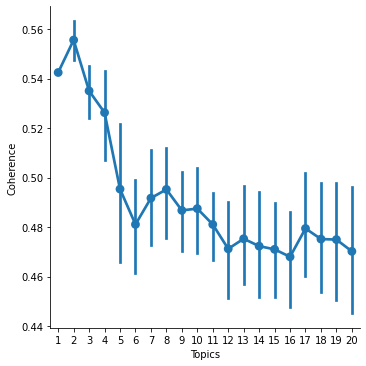

In [ ]:
#show the c_v value for different topic numbers for positive comments

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/lda_tuning_results_always_positive_comments.csv')

import seaborn as sns

#sns.catplot(x="Topics", y="Coherence", kind="point", data=df)

sns.catplot(x="Topics", y="Coherence", kind='point', data=df) #palette=sns.color_palette(['green', 'blue'])

In [ ]:
# Build LDA model for the positive comments with the optimal number of topics (n = 2)

import gensim

id2word, corpus = generate_corpus(positive_lemmatized)

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=2, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=3,
                                       per_word_topics=True)

#view the topics in LDA

from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

#calculate coherence score

from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=positive_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

[(0,
  '0.119*"girl" + 0.080*"like" + 0.034*"say" + 0.029*"boy" + 0.027*"run" + '
  '0.011*"mean" + 0.011*"tell" + 0.010*"make" + 0.009*"think" + 0.008*"thing"'),
 (1,
  '0.027*"man" + 0.023*"woman" + 0.022*"video" + 0.013*"people" + '
  '0.009*"comment" + 0.009*"gender" + 0.008*"see" + 0.008*"think" + '
  '0.007*"get" + 0.007*"strong"')]

Coherence Score:  0.5526600037187342


In [ ]:
# Build LDA model for the negative comments with a random number of topics

import gensim

id2word, corpus = generate_corpus(negative_lemmatized)

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=4, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=3,
                                       per_word_topics=True)

#view the topics in LDA

from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

#calculate coherence score

from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=negative_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

[(0,
  '0.134*"girl" + 0.098*"like" + 0.040*"boy" + 0.035*"run" + 0.030*"say" + '
  '0.023*"insult" + 0.017*"guy" + 0.015*"throw" + 0.013*"thing" + '
  '0.013*"tell"'),
 (1,
  '0.024*"video" + 0.022*"feminist" + 0.020*"get" + 0.018*"make" + '
  '0.016*"always" + 0.015*"people" + 0.014*"go" + 0.013*"stop" + '
  '0.012*"commercial" + 0.011*"stupid"'),
 (2,
  '0.010*"gender" + 0.010*"one" + 0.009*"confidence" + 0.008*"need" + '
  '0.008*"stereotype" + 0.008*"go" + 0.008*"society" + 0.007*"woman" + '
  '0.007*"puberty" + 0.007*"people"'),
 (3,
  '0.088*"man" + 0.076*"woman" + 0.026*"strong" + 0.022*"male" + '
  '0.020*"female" + 0.014*"weak" + 0.013*"physically" + 0.011*"well" + '
  '0.010*"average" + 0.010*"fact"')]

Coherence Score:  0.5394038002502015


In [ ]:
#fine tune the LDA base model (for negative comments) by setting up the function

# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=3,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=negative_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

print('Done')

Done


In [ ]:
#fine tune the LDA model for the negative comments

import gensim
import numpy as np
from tqdm import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 1
max_topics = 21
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
print('alpha:', alpha)
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
#eta.append('symmetric')
print('beta:', beta)


# Validation sets
num_of_docs = len(corpus)
model_results = {'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run

# iterate through number of topics
for k in tqdm(topics_range):
    # iterate through alpha values
    for a in alpha:
        # iterare through beta values
        for b in beta:
            # get the coherence score for the given parameters
            cv = compute_coherence_values(corpus=corpus, dictionary=id2word, 
                                                  k=k, a=a, b=b)
            # Save the model results
            model_results['Topics'].append(k)
            model_results['Alpha'].append(a)
            model_results['Beta'].append(b)
            model_results['Coherence'].append(cv)
                    
                
pd.DataFrame(model_results).to_csv('/content/drive/MyDrive/lda_tuning_results_always_negative_comments.csv', index=False)


print('========================================Done!=======================================')

  0%|          | 0/20 [00:00<?, ?it/s]

alpha: [0.01, 0.31, 0.61, 0.9099999999999999]
beta: [0.01, 0.31, 0.61, 0.9099999999999999]


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)
100%|██████████| 20/20 [1:20:51<00:00, 242.58s/it]

========================================Done!=======================================


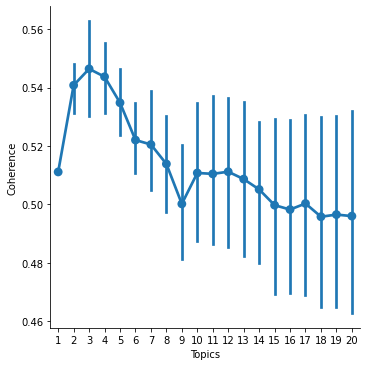

In [ ]:
#show the c_v value for different topic numbers for positive comments

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/lda_tuning_results_always_negative_comments.csv')

import seaborn as sns

#sns.catplot(x="Topics", y="Coherence", kind="point", data=df)

sns.catplot(x="Topics", y="Coherence", kind='point', data=df)

In [ ]:
# Build LDA model for the negative comments with the optimal number of topics (n = 3)

import gensim

id2word, corpus = generate_corpus(negative_lemmatized)

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=3, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=3,
                                       per_word_topics=True)

#view the topics in LDA

from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

#calculate coherence score

from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=negative_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

[(0,
  '0.123*"girl" + 0.091*"like" + 0.038*"boy" + 0.032*"run" + 0.029*"say" + '
  '0.021*"insult" + 0.016*"guy" + 0.014*"throw" + 0.013*"thing" + '
  '0.012*"tell"'),
 (1,
  '0.024*"video" + 0.019*"get" + 0.019*"make" + 0.018*"feminist" + '
  '0.015*"always" + 0.014*"go" + 0.014*"people" + 0.011*"stop" + '
  '0.010*"commercial" + 0.009*"stupid"'),
 (2,
  '0.055*"man" + 0.054*"woman" + 0.015*"strong" + 0.013*"male" + '
  '0.013*"female" + 0.009*"gender" + 0.008*"well" + 0.007*"fact" + '
  '0.006*"weak" + 0.006*"physically"')]

Coherence Score:  0.5237059318823737
